In [ ]:
#!pip install transformers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import sklearn
import nltk
import torch
import re


In [93]:
from sklearn.model_selection import train_test_split
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import BertForSequenceClassification, BertTokenizer
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Button

In [ ]:
with open('//content//drive//MyDrive//Gulosoft//out.csv', encoding ='ISO-8859-2') as f:
    text = f.read()

In [ ]:
df = pd.read_csv('//content//drive//MyDrive//Gulosoft//out.csv', encoding = 'ISO-8859-2')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head(2)

,_id,Id,GroupId,GroupName,PostId,PostType,UserProfileId,ProfileName,ProfileImage,ProfileImageOriginal,...,NoOfComment,NoOfShare,DateTimeOfPost,connectionStatus,postUrl,DestinationURL,savePostDateTimeUtc,mediaPostUrlUpdated,CommentDetails,HashTag
0,"{""$oid"":""5b1aa7ee8bb55b300895a775""}",5b1aa7ee8bb55b300895a774,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2171117736262189""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,...,0,0,1528458840,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN
1,"{""$oid"":""5b1aa7ee8bb55b300895a777""}",5b1aa7ee8bb55b300895a776,"{""$numberLong"":""1124374080936565""}",Empower Your Online Success,"{""$numberLong"":""2170670772973552""}",IMAGE,1348490940,Shawn Lemoine,https://api.socioleadspro.com/api/Media/getpro...,https://scontent-lhr3-1.xx.fbcdn.net/v/t1.0-1/...,...,0,0,1528428573,False,https://www.facebook.com/groups/11243740809365...,NaN,1528473583,True,NaN,NaN


In [ ]:
df.shape

(201886, 32)

In [ ]:
df.columns

Index(['_id', 'Id', 'GroupId', 'GroupName', 'PostId', 'PostType',
       'UserProfileId', 'ProfileName', 'ProfileImage', 'ProfileImageOriginal',
       'Message', 'FeedText', 'FeedDescription', 'FeedTitle', 'postImgUrl',
       'postImgUrlOriginal', 'videoTitle', 'VideoSiteRedirectionUrl',
       'VideoDescription', 'PostRedirectionImg', 'websiteUrl', 'NoOfLike',
       'NoOfComment', 'NoOfShare', 'DateTimeOfPost', 'connectionStatus',
       'postUrl', 'DestinationURL', 'savePostDateTimeUtc',
       'mediaPostUrlUpdated', 'CommentDetails', 'HashTag'],
      dtype='object')

In [ ]:
df.Message

0          Youre about to GET LUCKY! Rise and shine. HAP...
1          Rest up, tomorrows a BIG DAY.\r\n You&#039;re...
2          Start PRESSING with FORWARD moving people!\r\...
3          Everyone can do it as the work required to ea...
4          You have a habit of waking up every morning t...
                                ...                        
201881     What has $20 done for you lately? Believe it ...
201882     WHO WANT TO MAKE $5000 - $10,000 - $20,000 A ...
201883    Yoyozhu  Aruide was founded in 2012, which is ...
201884     Need ko po ng 30 LEADERS / NETWORKERS na mahi...
201885     What has $20 done for you lately? Believe it ...
Name: Message, Length: 201886, dtype: object

In [ ]:
df.Message.value_counts()

In [ ]:
text = df.Message

In [ ]:
def remove_numbers_and_symbols(input_string):
    output_string = re.sub(r'[^a-zA-Z\s]', '', input_string)
    return output_string

In [ ]:
text = text.apply(remove_numbers_and_symbols)

print(text)

0          Youre about to GET LUCKY Rise and shine HAPPY...
1          Rest up tomorrows a BIG DAY\r\n Youre alot cl...
2          Start PRESSING with FORWARD moving people\r\n...
3          Everyone can do it as the work required to ea...
4          You have a habit of waking up every morning t...
                                ...                        
201881     What has  done for you lately Believe it when...
201882     WHO WANT TO MAKE      A WEEK  I am going to t...
201883    Yoyozhu  Aruide was founded in  which is profe...
201884     Need ko po ng  LEADERS  NETWORKERS na mahilig...
201885     What has  done for you lately Believe it when...
Name: Message, Length: 201886, dtype: object


In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [ ]:
type(text)

pandas.core.series.Series

In [ ]:
text = text.to_string()

In [ ]:
type(text)

str

In [ ]:
input_ids = torch.tensor(tokenizer.encode(text, max_length=512)).unsqueeze(0)

In [ ]:
#print(input_ids)

In [ ]:
with torch.no_grad():
    output = model(input_ids)[0]
    _, predicted = torch.max(output, dim=1)
    sentiment = predicted.tolist()

In [ ]:
total = len(sentiment)
negative = sentiment.count(0) / total
neutral = sentiment.count(1) / total
positive = sentiment.count(2) / total


assert (negative + neutral + positive) == 1


print("Negative: {:.2f}%".format(negative * 100))
print("Neutral: {:.2f}%".format(neutral * 100))
print("Positive: {:.2f}%".format(positive * 100))

Negative: 0.00%
Neutral: 100.00%
Positive: 0.00%


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
text = '''Need ko po ng 30 LEADERS / NETWORKERS na mahilig mag FACEBOOK.
 Nagbibuild ako ng bagong line, kaya sure spill over! Ako mismo ang mag guide sayo 🙂 Kahit full-time single dad / moms, employed, unemployed, OFWs kikita ng malaki ok naba sayo ang ✔₱8,000 per day ✔₱56,000 per week ✔₱240,000 per month... No need PC No need Wifi cp at DATA lang okay na NO more SOLVING CAPTCHA 🤔 NO no more LOG IN/OUT 🤔 NOT PALUWAGAN 🤔 NOT TABLE OF EXIT 🤔 NOT BTC TRADING 🤔 Pwede sa lahat!! literal na kikita ka dto.. ✔✔💯% May kita kahit No invite ka 
 ✔100% AUTOMATIC MY PUMAPASOK NA KITA ARAW ARAW🤔🤔 ✔100%PURE ONLINE ✔100% LEGIT Interested?   PM ME  para matulongan kita kng paano simulan ang business
 courses Step-by-Step Video tutorials in just 500 Rs/- ($10)\r  full package (1450+ video tutorials) (35 GB+ data)\r\n... DigitalMarketing (300+ videos) Instagram marketing (50+ videos) Seo (100+ videos) Dropshipping (75+ videos) Freelancing (45+ videos) Adwords (75+ videos)
  Graphic designing (60+ videos) Web development (300+ videos) Photoshop (145+ videos) Ecommerce wordpress (145+ videos) Video editing (90+ videos) White board animation (20+ videos) Amazon fba (40+ videos)\r\n Only for today..
  .\r\n Lifetime Access...\r\n Come ib .... inbox me directly if you are interested....\r\n 13 courses Step-by-Step Video tutorials in just 500 Rs/- ($10) full package  (1450+ video tutorials) (35 GB+ data)... DigitalMarketing (300+ videos)\n Instagram marketing (50+ videos)\n Seo (100+ videos)\n Dropshipping (75+ videos)\n Freelancing (45+ videos)\n Adwords (75+ videos)\n Graphic designing (60+ videos)\n Web development (300+ videos)\n Photoshop (145+ videos)\n Ecommerce wordpress  (145+ videos)\n Video editing (90+ videos)\n White board animation (20+ videos)\n Amazon fba (40+ videos) Only for today... Lifetime Access... Come ib .... inbox me directly if you are interested.... See more     120'''

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sentences = nltk.sent_tokenize(text)

In [ ]:
positive_words = []
negative_words = []
neutral_words = []

In [ ]:
for sentence in sentences:
  words = nltk.word_tokenize(sentence)
  for word in words:
    sentiment = sia.polarity_scores(word)['compound']
    if sentiment > 0:
      positive_words.append(word)
    elif sentiment < 0:
      negative_words.append(word)
    else:
      neutral_words.append(word)

In [ ]:
print("Positive Words:", positive_words)
print("Negative Words:", negative_words)
print("Neutral Words:", neutral_words)

Positive Words: ['sure', 'ok', 'okay', 'SOLVING', 'invite', 'Interested', 'Freelancing', 'Amazon', 'interested', 'Freelancing', 'Amazon', 'interested']
Negative Words: ['po', 'No', 'No', 'NO', 'NO', 'no', 'No']
Neutral Words: ['Need', 'ko', 'ng', '30', 'LEADERS', '/', 'NETWORKERS', 'na', 'mahilig', 'mag', 'FACEBOOK', '.', 'Nagbibuild', 'ako', 'ng', 'bagong', 'line', ',', 'kaya', 'spill', 'over', '!', 'Ako', 'mismo', 'ang', 'mag', 'guide', 'sayo', '🙂', 'Kahit', 'full-time', 'single', 'dad', '/', 'moms', ',', 'employed', ',', 'unemployed', ',', 'OFWs', 'kikita', 'ng', 'malaki', 'naba', 'sayo', 'ang', '✔₱8,000', 'per', 'day', '✔₱56,000', 'per', 'week', '✔₱240,000', 'per', 'month', '...', 'need', 'PC', 'need', 'Wifi', 'cp', 'at', 'DATA', 'lang', 'na', 'more', 'CAPTCHA', '🤔', 'more', 'LOG', 'IN/OUT', '🤔', 'NOT', 'PALUWAGAN', '🤔', 'NOT', 'TABLE', 'OF', 'EXIT', '🤔', 'NOT', 'BTC', 'TRADING', '🤔', 'Pwede', 'sa', 'lahat', '!', '!', 'literal', 'na', 'kikita', 'ka', 'dto', '..', '✔✔💯', '%', 'May',

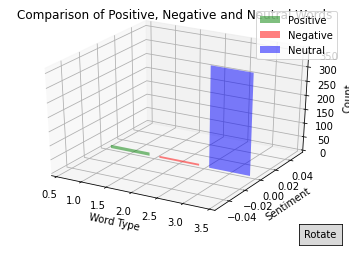

In [ ]:
positive_count = len(positive_words)
negative_count = len(negative_words)
neutral_count = len(neutral_words)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
positive = ax.bar([1], [positive_count], zs=[0], zdir='y', color='g', alpha=0.5)
negative = ax.bar([2], [negative_count], zs=[0], zdir='y', color='r', alpha=0.5)
neutral = ax.bar([3], [neutral_count], zs=[0], zdir='y', color='b', alpha=0.5)
ax.set_xlabel('Word Type')
ax.set_ylabel('Sentiment')
ax.set_zlabel('Count')
ax.set_title('Comparison of Positive, Negative and Neutral Words')
ax.legend([positive, negative, neutral], ['Positive', 'Negative', 'Neutral'])

rotate_button_ax = plt.axes([0.8, 0.05, 0.1, 0.075])
rotate_button = Button(rotate_button_ax, 'Rotate')

def rotate(event):
    ax.view_init(azim=ax.azim+30)
    plt.draw()


rotate_button.on_clicked(rotate)


plt.ion()

plt.show()






In [ ]:

fig = go.Figure(data=[
    go.Scatter3d(x=[1], y=[1], z=[positive_count], name='Positive', mode='markers', marker=dict(size=10, color='green')),
    go.Scatter3d(x=[2], y=[1], z=[negative_count], name='Negative', mode='markers', marker=dict(size=10, color='red')),
    go.Scatter3d(x=[3], y=[1], z=[neutral_count], name='Neutral', mode='markers', marker=dict(size=10, color='blue'))
])

fig.update_layout(scene=dict(xaxis_title='Word Type', yaxis_title='Sentiment', zaxis_title='Count'), 
                  title = 'Created by Soumyadarshan :  Facebook Sentimental analysis')
fig.show()
